# Time-series analysis

## 1. What is a Time Series?

**Definition**

> Time series is a sequence of observations recorded at regular and equidistant time intervals.

Depending on the frequency of observations, a time-series may typically be hourly, daily, weekly, monthly, quarterly and/or annual. Sometimes, you might have seconds and minute-wise time series as well, like, number of clicks and user visits every minute etc.

Why time-series analysis is so relevant?

Because it is the preparatory step before we develop a forecast of the series of events.

Besides, time-series forecasting has enormous commercial significance because stuff that is important to a business like:

* demand and sales, 

* number of visitors to a website, 

* stock price 

* etc.

## What does analyzing a time series involve?

Time-series analysis involves understanding various aspects about the inherent nature of the series, e.g. hidden or not so evident patterns and identification of hidden components, so that you are better informed to create meaningful and accurate forecasts.


# 2. Creating a time-series objet in Python

The data for a time series typically stores in `.csv` in a develoipment environment, and it also comes as a `sql` table in production environments.

The `.csv` files or other spreadsheet formats and contains typicallytwo columns: 

1. the date and 

2. the measured value.

In `Python`, we can use the `read_csv()` in `Pandas` package to read the time-series dataset (as an example, we use the `.csv` file on Australian Drug Sales stored in the Github repository of the course) as a pandas dataframe.

[Australian Drug Sales data](https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv)

Adding the `parse_dates=['date']` argument will make the date column to be parsed as a date field.



In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

# Import as Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


## 2.1. Time-series panel data

**Definition**

> A time-series panel data is a time based dataset in which two or more observations units are observed coincidently over time. We can thing of it as a combination of multiple time-series of events observed in different observation units.

The difference with time-series data is that, in addition to time-series, it also contains one or more related variables that are measured for the same time periods.

Typically, the columns present in panel data contain explanatory variables that can be helpful in predicting the $Y$, provided those columns will be available at the future forecasting period.

An example of panel data is shown below in the set of Market arrivals:

[Market Arrivals](https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data_Panel.csv)


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data_Panel.csv')
df = df.loc[df.market=='MUMBAI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
6654,MUMBAI,January,2004,267100,719,971,849,MS,MUMBAI,January-2004
6655,MUMBAI,January,2005,275845,261,513,387,MS,MUMBAI,January-2005
6656,MUMBAI,January,2006,228000,315,488,402,MS,MUMBAI,January-2006
6657,MUMBAI,January,2007,205200,866,1136,997,MS,MUMBAI,January-2007
6658,MUMBAI,January,2008,267550,348,550,448,MS,MUMBAI,January-2008


## 3. Visualizing time-series data

The simplest and most usefult visualization corresponds to a scatter plot between the `time-domain variable` and the `measure variable`.

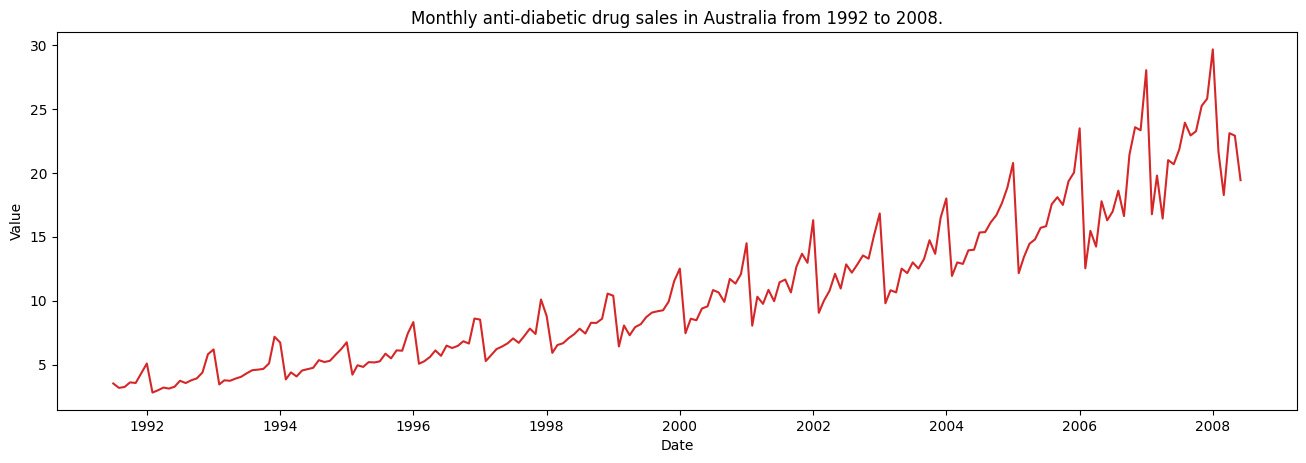

In [4]:
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')  

## Seasonality

Since its a monthly time-series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

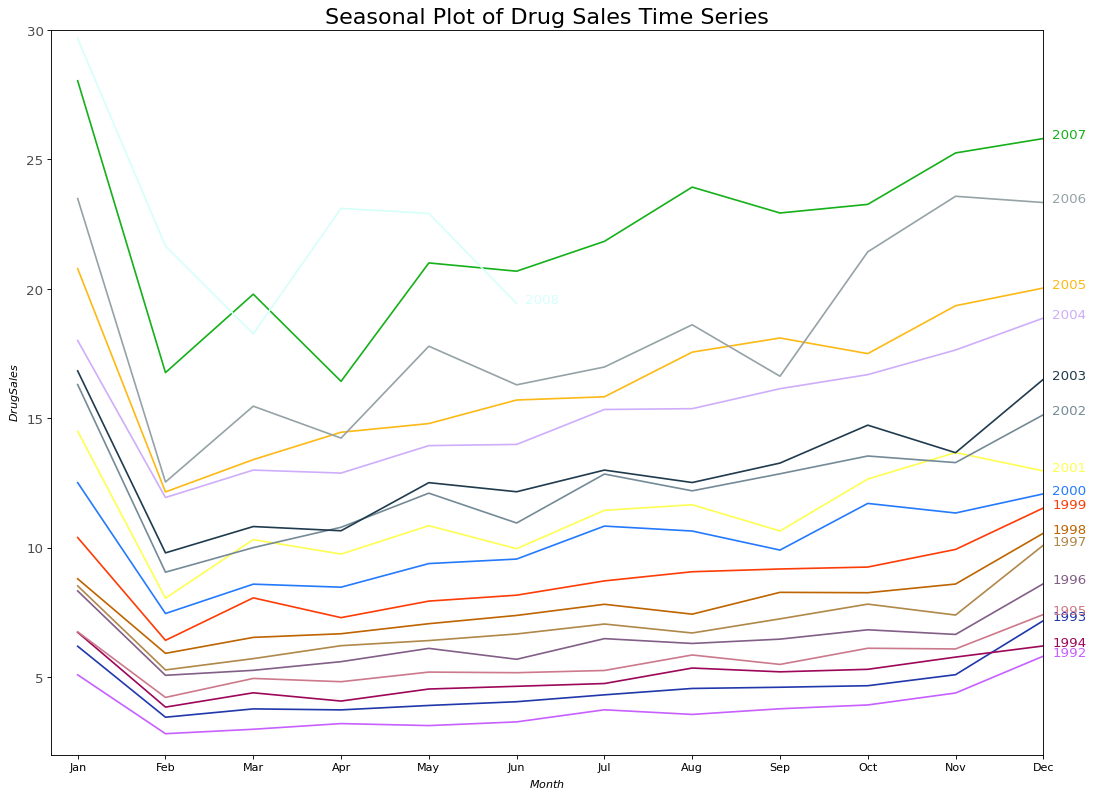

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.

However, as years progress, the drug sales increase overall. You can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, you can do a month-wise boxplot to visualize the monthly distributions.

## Seasonality as a box-plot

We can group the data at seasonal intervals and see how the values are distributed within a given year or month and how it compares over time.

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, how to find out any deviations from the usual pattern?


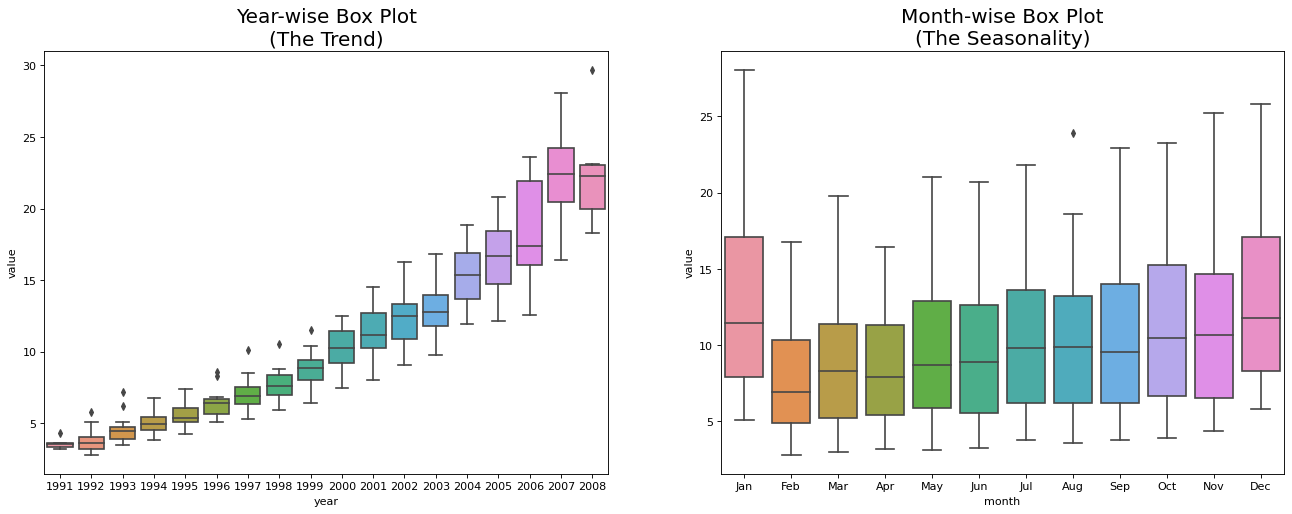

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')
df.reset_index(inplace=True)

# Prepare data
df['year'] = [d.year for d in df.date]
df['month'] = [d.strftime('%b') for d in df.date]
years = df['year'].unique()

# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

# 4. Hidden patterns in a time-series

Any time series may be split into the following components: 

> Base Level + Trend + Seasonality + Error

A **trend** is observed when there is an increasing or decreasing slope observed in the time series. Whereas seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

However, it is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series may be imagined as a combination of the trend, seasonality and the error terms.

Another aspect to consider is the **cyclic** behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse **cyclic** effect with ‘seasonal’ effect.

So, How to diffentiate between a **cyclic** vs **seasonal** pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

## Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an additive or multiplicative, wherein, each observation in the series can be expressed as either a sum or a product of the components:

**I. Additive time series:**

> Value = Base Level + Trend + Seasonality + Error

** II. Multiplicative Time Series:**

> Value = Base Level x Trend x Seasonality x Error

# 5. Time-series decomposition into hidden components

We can do a classical decomposition of a time series by considering the series as an **additive** or **multiplicative** combination of

* base level, 

* trend, 

* seasonal index and 

* residual.

The `seasonal_decompose()` function in `statsmodels` package implements this conveniently.

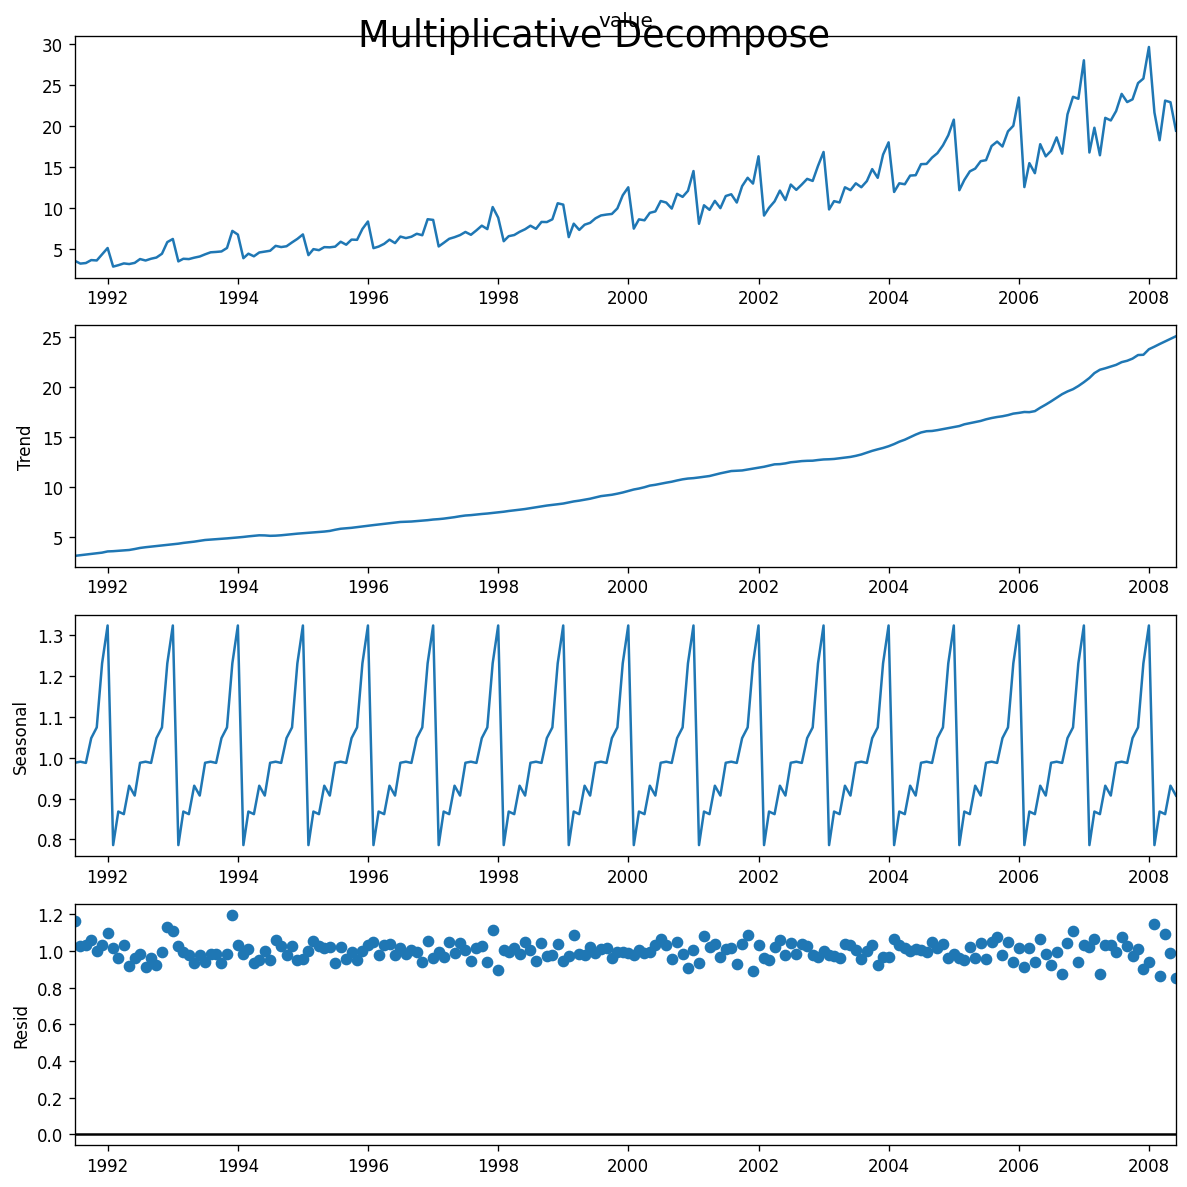

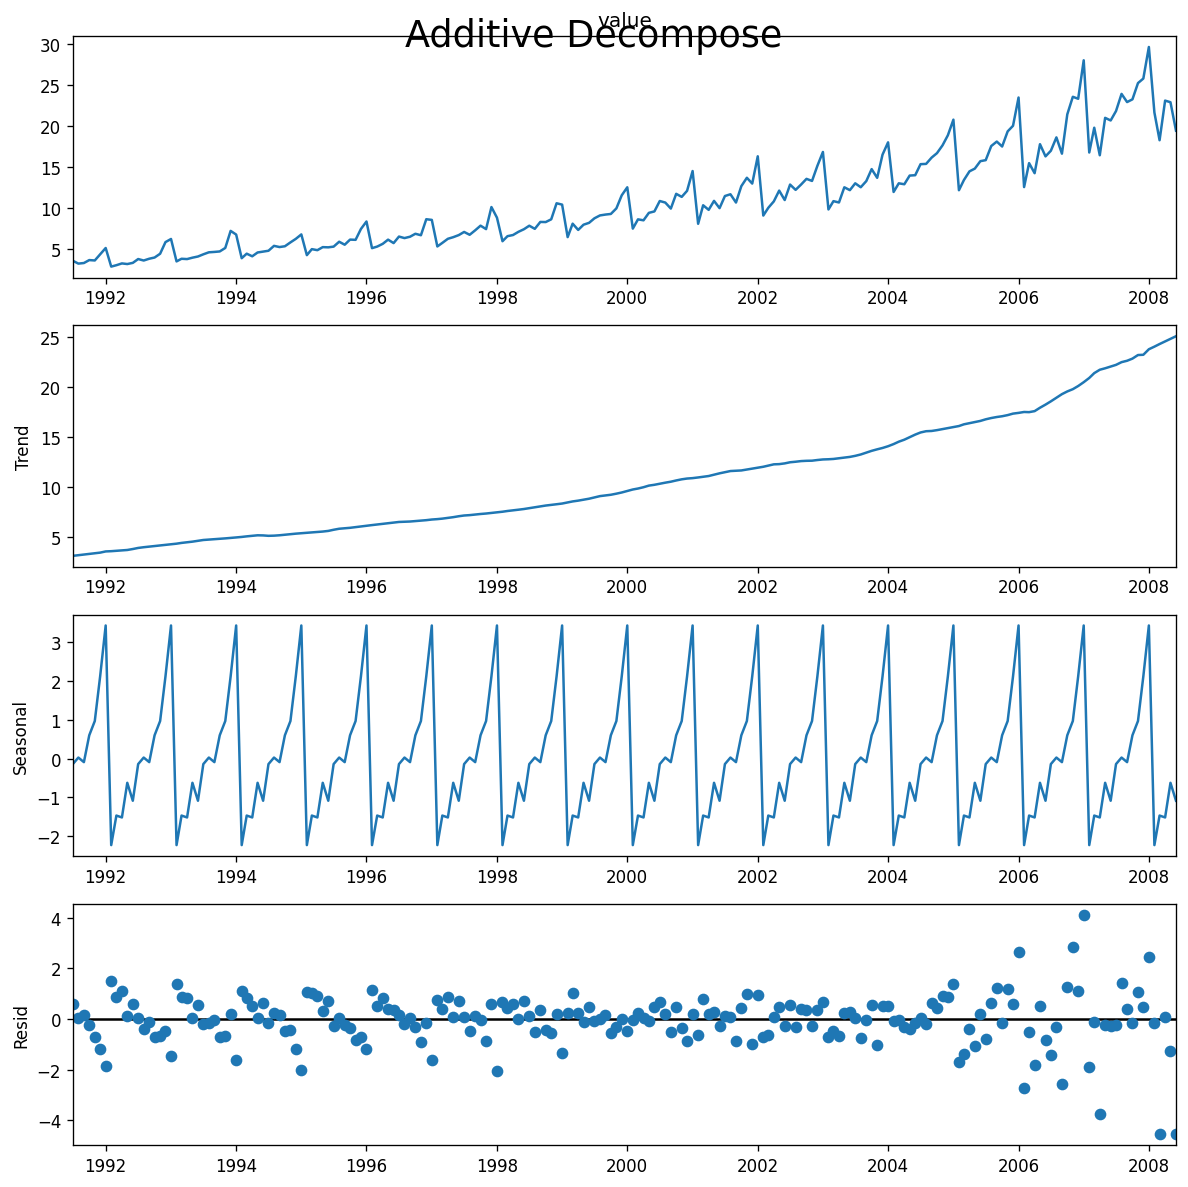

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Import Data
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

Setting `extrapolate_trend='freq'` takes care of any missing values in the trend and residuals at the beginning of the series.

If we look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. 

So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

If you check, the product of `seas`, `trend` and `resid` columns bellow should exactly equal to the actual_values.

In [10]:
# Extracting the components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


# 6. Stationary and non-stationary time-series

**Definition**

> **Stationarity** is a conceptual property of a time-series. A stationary series is one where the key values of the series (such as `mean`, `variance` or `correlation`) is not a function of time.

That is, the statistical properties of the series like mean, variance and autocorrelation are constant over time. Autocorrelation of the series is nothing but the correlation of the series with its previous values, more on this coming up.

A stationary time-series is devoid of seasonal effects as well.

So why does a stationary series matter?

We'll come to that in a bit, but understand that it is possible to make nearly any time series stationary by applying a suitable transformation. 

Most statistical forecasting methods are designed to work on a stationary time series. The first step in the forecasting process is typically to do some transformation to convert a non-stationary series to stationary.

## Forcing **stationarity**

We can make series stationary by applying either of the following transformations on the data, or a combination of them:

1. Differencing the Series (once or more)

2. Take the log of the series

3. Take the nth root of the series

The most common and convenient method to stationarize the series is by differencing the series at least once until it becomes approximately stationary.

**So what is differencing?**

If $Y_t$ is the value at time $t$, then the first difference of 

> $Y = Y_t – Y_{t-1}.$ 

In simpler terms, differencing the series is nothing but subtracting the next value by the current value.

If the first difference doesn't make a series stationary, you can go for the second differencing. And so on.

For example, consider the following series: 

> $[1, 5, 2, 12, 20]$

* First differencing gives: 

> $[5-1, 2-5, 12-2, 20-12] = [4, -3, 10, 8]$

* Second differencing gives: 

> $[-3-4, -10-3, 8-10] = [-7, -13, -2]$



# 7. Stationarity and forecasting

Forecasting a stationary series is relatively easy and the forecasts are more reliable.

An important reason is, autoregressive forecasting models are essentially linear regression models that utilize the lag(s) of the series itself as predictors.

We know that linear regression works best if the predictors (X variables) are not correlated against each other. So, stationarizing the series solves this problem since it removes any persistent autocorrelation, thereby making the predictors(lags of the series) in the forecasting models nearly independent.

Now that we’ve established that stationarizing the series important, how do you check if a given series is stationary or not?

## Testing for stationarity

The stationarity of a series can be established by looking at the plot of the series like we did earlier.

Another method is to split the series into 2 or more contiguous parts and computing the summary statistics like the mean, variance and the autocorrelation. If the stats are quite different, then the series is not likely to be stationary.

Nevertheless, you need a method to quantitatively determine if a given series is stationary or not. This can be done using statistical tests called **Unit Root Tests**. There are multiple variations of this, where the tests check if a time series is non-stationary and possess a unit root.

There are multiple implementations of Unit Root tests like:

* Augmented Dickey Fuller test (`ADH` test)

* Kwiatkowski-Phillips-Schmidt-Shin (`KPSS` test)

* Philips Perron test (PP Test)

The most commonly used is the `ADF` test, where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the `p-value` in `ADH` test is less than the significance level **$(0.05)$**, you reject the null hypothesis.

The `KPSS` test, on the other hand, is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of `ADH` test. 

The below code implements these two tests using `statsmodels` package in `Python.`

In [11]:
from statsmodels.tsa.stattools import adfuller, kpss
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'])

# ADF Test
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067287
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476

KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


## White-noise and stationary time-series

**Defintion**

> Like a stationary series, the **white-noise** is also not a function of time, that is its mean and variance does not change over time. But the difference is, the white noise is completely random with a mean of 0.

In white noise there is no pattern whatsoever. If you consider the sound signals in an FM radio as a time series, the blank sound you hear between the channels is white noise.

Mathematically, a sequence of completely random numbers with mean zero is a white noise.

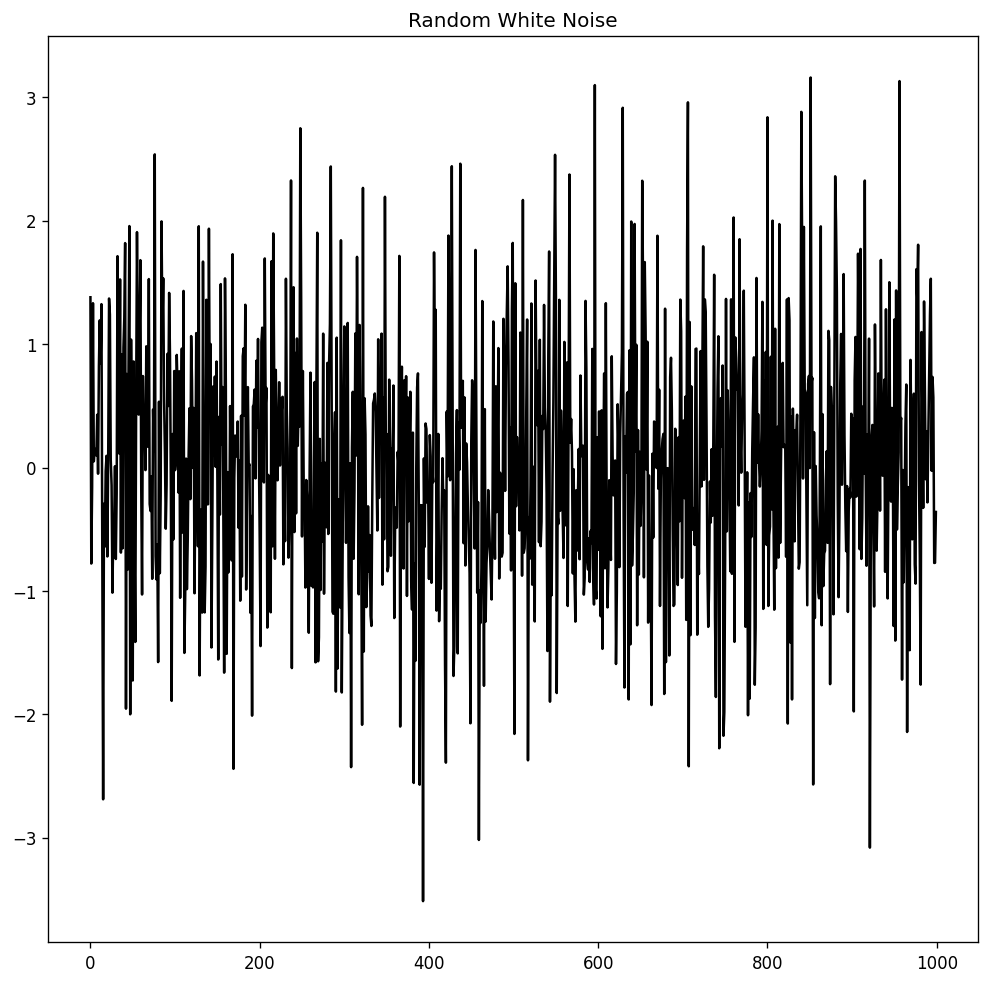

In [12]:
randvals = np.random.randn(1000)
pd.Series(randvals).plot(title='Random White Noise', color='k')

# 8. Time-series decomposition

## 8.1. Detrending

**Defintion**

> **Detrending** a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

a. Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms ($x^2$) in the model.

2. Subtract the trend component obtained from time series decomposition we saw earlier.

3. Subtract the mean

4. Apply a filter like `Baxter-King` filter (`statsmodels.tsa.filters.bkfilter`) or the `Hodrick-Prescott` filter (`statsmodels.tsa.filters.hpfilter`) to remove the moving average trend lines or the cyclical components.

Let’s implement the first two methods.


**# Using `scipy`: Subtract the line of best fit**

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the least squares fit')

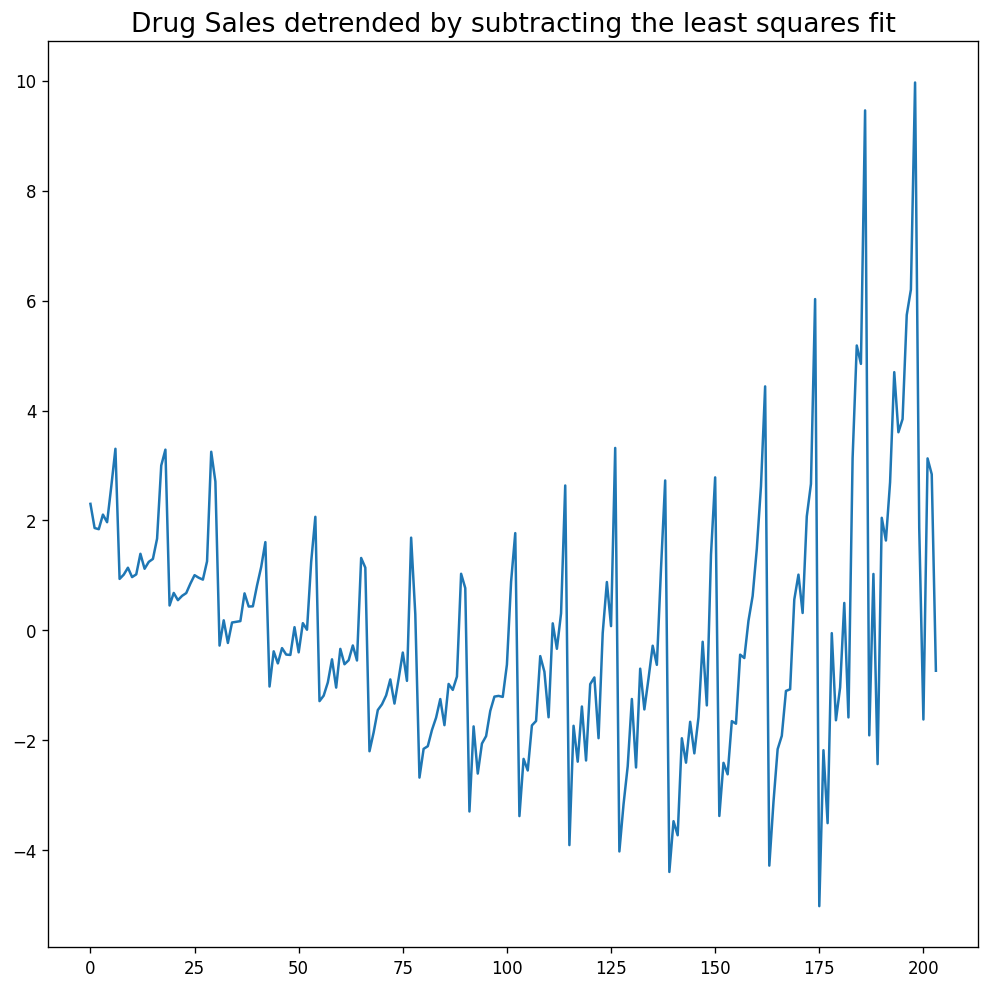

In [13]:
from scipy import signal
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'])
detrended = signal.detrend(df.value.values)
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the least squares fit', fontsize=16)

**Using `statmodels`: Subtracting the Trend Component.**

Text(0.5, 1.0, 'Drug Sales detrended by subtracting the trend component')

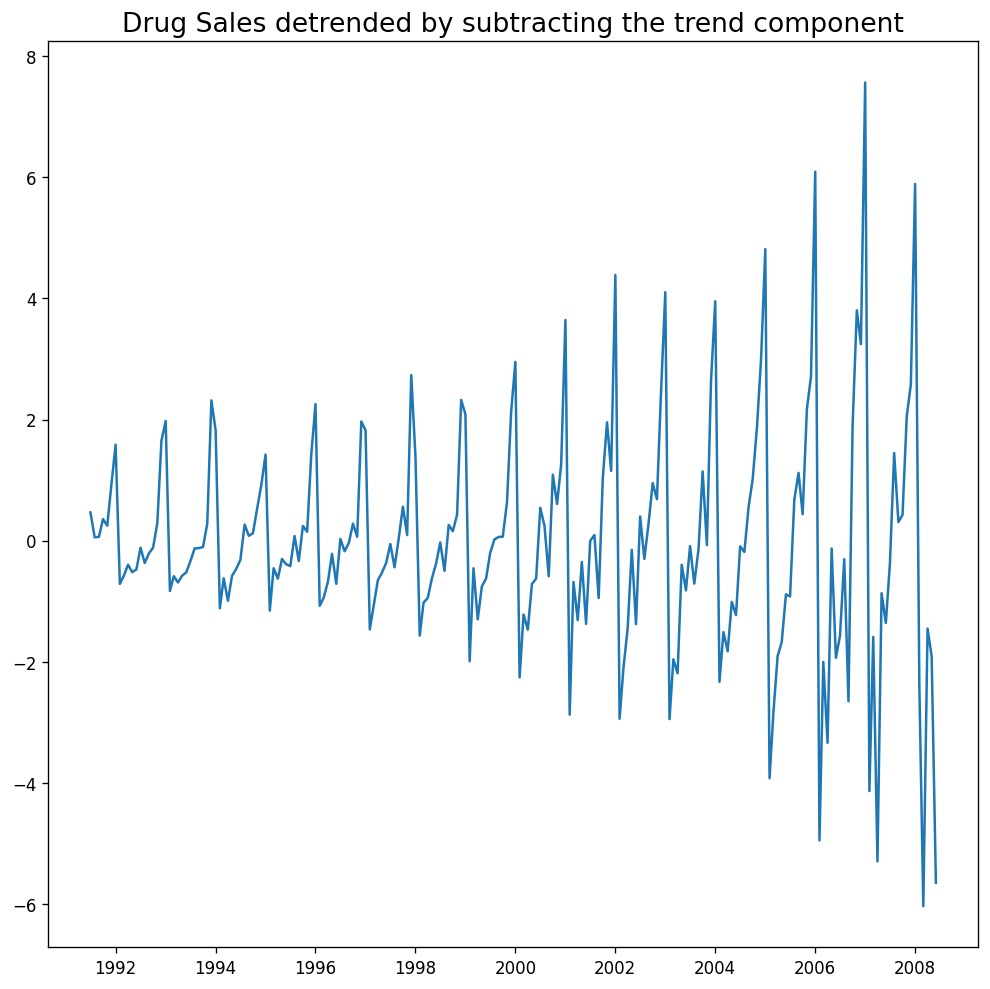

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')
detrended = df.value.values - result_mul.trend
plt.plot(detrended)
plt.title('Drug Sales detrended by subtracting the trend component', fontsize=16)

## 8.2. Deseasonalizing

There are multiple approaches to deseasonalize a time series as well. Below are a few:

1. Take a moving average with length as the seasonal window. This will smoothen in series in the process.

2. Seasonal difference the series (subtract the value of previous season from the current value)

3. Divide the series by the seasonal index obtained from `STL` decomposition

If dividing by the seasonal index does not work well, try taking a log of the series and then do the deseasonalizing. You can later restore to the original scale by taking an exponential.

[]

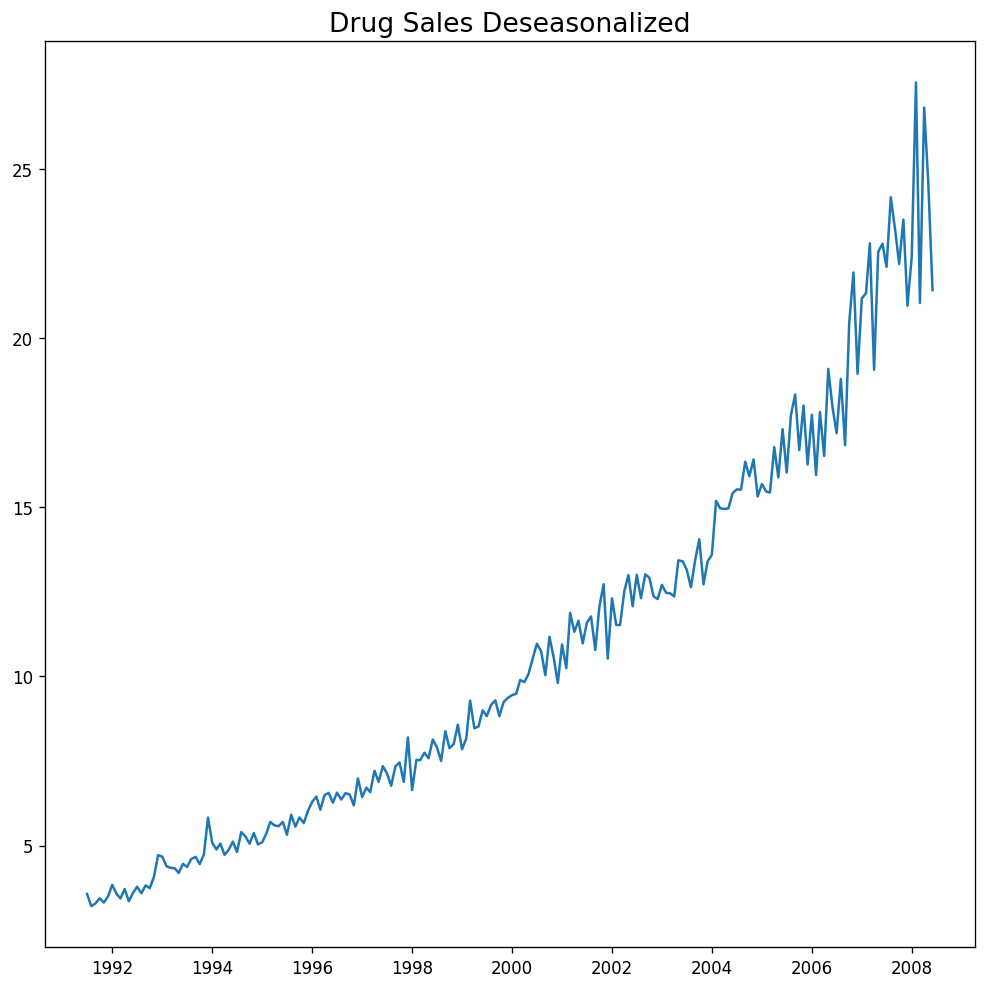

In [15]:
# Subtracting the Trend Component.
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date')

# Time Series Decomposition
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.value.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()

## 8.3.Smoothing

Smoothening of a time series may be useful in:

* Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

* The smoothed version of series can be used as a feature to explain the original series itself.

* Visualize the underlying trend better

So how to smoothen a series? Let’s discuss the following methods:

1. Take a moving average

2. Do a `LOESS` smoothing (Localized Regression)

3. Do a `LOWESS` smoothing (Locally Weighted Regression)

Moving average is nothing but the average of a rolling window of defined width. 

But we must choose the window-width wisely, because, large window-size will over-smooth the series. For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

`LOESS`, short for ‘Localized regrESSion’ fits multiple regressions in the local neighborhood of each point. It is implemented in the statsmodels package, where you can control the degree of smoothing using frac argument which specifies the percentage of data points nearby that should be considered to fit a regression model.

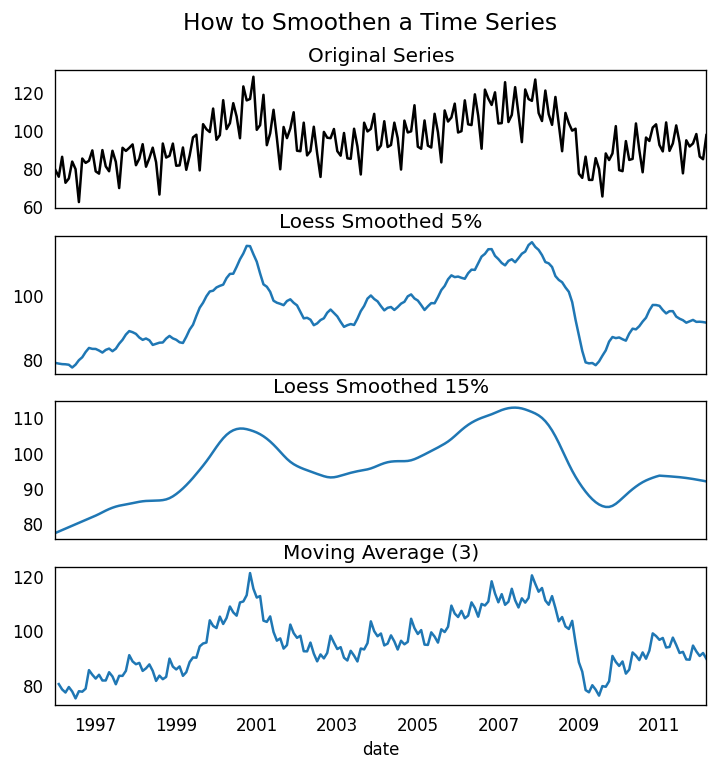

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Elecequip.csv', parse_dates=['date'], index_col='date')

# 1. Moving Average
df_ma = df_orig.value.rolling(3, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.05)[:, 1], index=df_orig.index, columns=['value'])
df_loess_15 = pd.DataFrame(lowess(df_orig.value, np.arange(len(df_orig.value)), frac=0.15)[:, 1], index=df_orig.index, columns=['value'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(7, 7), sharex=True, dpi=120)
df_orig['value'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['value'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['value'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (3)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

# 9. Time-series and missing values

Sometimes, your time series will have missing dates/times. That means, the data was not captured or was not available for those periods. It could so happen the measurement was zero on those days, in which case, case you may fill up those periods with zero.

Secondly, when it comes to time series, you should typically NOT replace missing values with the mean of the series, especially if the series is not stationary. What you could do instead for a quick and dirty workaround is to forward-fill the previous value.

However, depending on the nature of the series, you want to try out multiple approaches before concluding. Some effective alternatives to imputation are:

* Backward Fill

* Linear Interpolation

* Quadratic interpolation

* Mean of nearest neighbors

* Mean of seasonal couterparts

To measure the imputation performance, I manually introduce missing values to the time series, impute it with above approaches and then measure the mean squared error of the imputed against the actual values.

In [17]:
# # Generate dataset
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error
df_orig = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv', parse_dates=['date'], index_col='date').head(100)
df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data_Missing.csv', parse_dates=['date'], index_col='date')

fig, axes = plt.subplots(7, 1, sharex=True, figsize=(10, 12))
plt.rcParams.update({'xtick.bottom' : False})

## 1. Actual -------------------------------
df_orig.plot(title='Actual', ax=axes[0], label='Actual', color='red', style=".-")
df.plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")
axes[0].legend(["Missing Data", "Available Data"])

## 2. Forward Fill --------------------------
df_ffill = df.ffill()
error = np.round(mean_squared_error(df_orig['value'], df_ffill['value']), 2)
df_ffill['value'].plot(title='Forward Fill (MSE: ' + str(error) +")", ax=axes[1], label='Forward Fill', style=".-")

## 3. Backward Fill -------------------------
df_bfill = df.bfill()
error = np.round(mean_squared_error(df_orig['value'], df_bfill['value']), 2)
df_bfill['value'].plot(title="Backward Fill (MSE: " + str(error) +")", ax=axes[2], label='Back Fill', color='firebrick', style=".-")

## 4. Linear Interpolation ------------------
df['rownum'] = np.arange(df.shape[0])
df_nona = df.dropna(subset = ['value'])
f = interp1d(df_nona['rownum'], df_nona['value'])
df['linear_fill'] = f(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['linear_fill']), 2)
df['linear_fill'].plot(title="Linear Fill (MSE: " + str(error) +")", ax=axes[3], label='Cubic Fill', color='brown', style=".-")

## 5. Cubic Interpolation --------------------
f2 = interp1d(df_nona['rownum'], df_nona['value'], kind='cubic')
df['cubic_fill'] = f2(df['rownum'])
error = np.round(mean_squared_error(df_orig['value'], df['cubic_fill']), 2)
df['cubic_fill'].plot(title="Cubic Fill (MSE: " + str(error) +")", ax=axes[4], label='Cubic Fill', color='red', style=".-")

## 6. Mean of 'n' Nearest Past Neighbors ------
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n/2)
            lower = np.max([0, int(i-n_by_2)])
            upper = np.min([len(ts)+1, int(i+n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out

df['knn_mean'] = knn_mean(df.value.values, 8)
error = np.round(mean_squared_error(df_orig['value'], df['knn_mean']), 2)
df['knn_mean'].plot(title="KNN Mean (MSE: " + str(error) +")", ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")

## 7. Seasonal Mean ----------------------------
def seasonal_mean(ts, n, lr=0.7):
    """
    Compute the mean of corresponding seasonal periods
    ts: 1D array-like of the time series
    n: Seasonal window length of the time series
    """
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            ts_seas = ts[i-1::-n]  # previous seasons only
            if np.isnan(np.nanmean(ts_seas)):
                ts_seas = np.concatenate([ts[i-1::-n], ts[i::n]])  # previous and forward
            out[i] = np.nanmean(ts_seas) * lr
    return out

df['seasonal_mean'] = seasonal_mean(df.value, n=12, lr=1.25)
error = np.round(mean_squared_error(df_orig['value'], df['seasonal_mean']), 2)
df['seasonal_mean'].plot(title="Seasonal Mean (MSE: " + str(error) +")", ax=axes[6], label='Seasonal Mean', color='blue', alpha=0.5, style=".-")

HTTPError: ignored

You could also consider the following approaches depending on how accurate you want the imputations to be.

* If you have explanatory variables use a prediction model like the random forest or k-Nearest Neighbors to predict it.

* If you have enough past observations, forecast the missing values.

* If you have enough future observations, backcast the missing values

* Forecast of counterparts from previous cycles.



# 10. Autocorrelation and partial autocorrelation functions

Autocorrelation is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

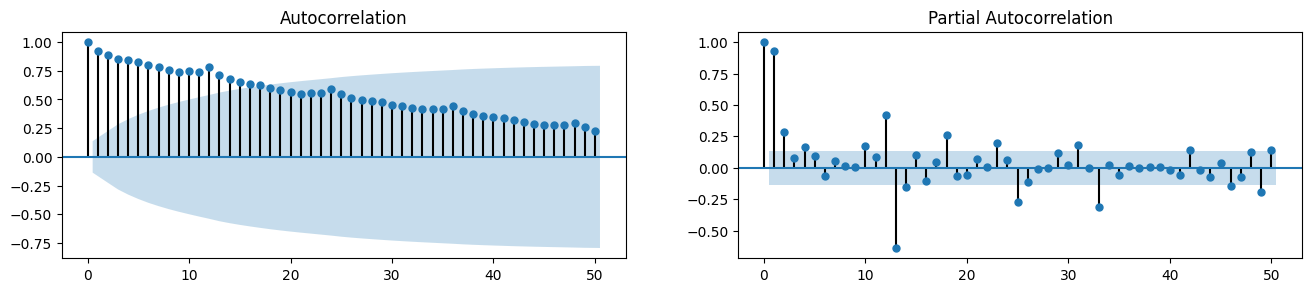

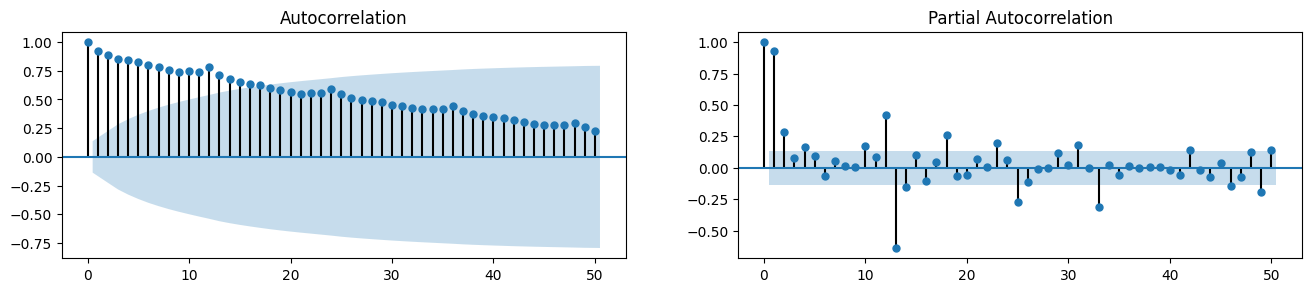

In [18]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df.value.tolist(), lags=50, ax=axes[1])

## Partial autocorrelation function

So how to compute partial autocorrelation?

The partial autocorrelation of `lag (k)` of a series is the coefficient of that lag in the autoregression equation of $Y$. The autoregressive equation of $Y$ is nothing but the linear regression of $Y$ with its own lags as predictors.

For Example, if $Y_t$ is the current series and $Y_{t-1}$ is the lag $1$ of $Y$, then the partial autocorrelation of lag 3 (i.e. $Y_{t-3}$) is the coefficient $\alpha_3$ of $Y_{t-3}$ in the following equation:

> $Y_t=\alpha_0 + \alpha_1 Y_{t-1}+ \alpha_2 Y_{t-2}+ \alpha_3 Y_{t-3}+\varepsilon_t$

## Lag plots

A `lag plot` is a scatter plot of a time series against a lag of itself. It is normally used to check for autocorrelation. If there is any pattern existing in the series like the one you see below, the series is autocorrelated. If there is no such pattern, the series is likely to be random white noise.

In below example on Sunspots area time series, the plots get more and more scattered as the `n_lag` increases.

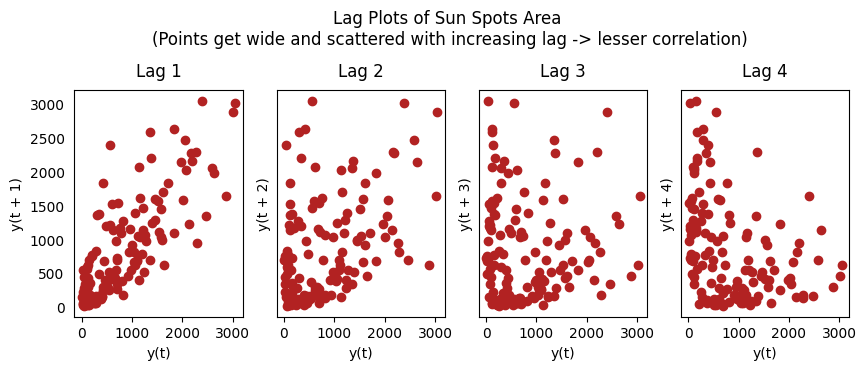

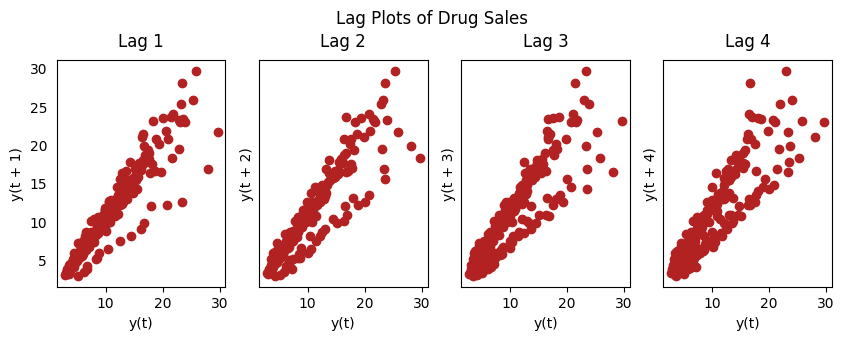

In [20]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
ss = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data_Cycle.csv')
a10 = pd.read_csv('https://raw.githubusercontent.com/jcmartinezovando/cd2010.100.2022/main/CD2010_04_TimeSeries_Data.csv')

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()